In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.cm as cm


In [5]:
fifa = pd.read_csv('fifa_data.csv')

fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


inspect the data

In [8]:
fifa.shape

(18207, 89)

In [9]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [10]:
#select all column where data value is numeric

fifa.select_dtypes(include='number')

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,158023,31,94,94,2202,5.0,4.0,4.0,10.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,1,20801,33,94,94,2228,5.0,4.0,5.0,7.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,2,190871,26,92,93,2143,5.0,5.0,5.0,10.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,3,193080,27,91,93,1471,4.0,3.0,1.0,1.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,4,192985,27,91,92,2281,4.0,5.0,4.0,7.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,19,47,65,1307,1.0,2.0,2.0,22.0,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,18203,243165,19,47,63,1098,1.0,2.0,2.0,21.0,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,18204,241638,16,47,67,1189,1.0,3.0,2.0,33.0,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,18205,246268,17,47,66,1228,1.0,3.0,2.0,34.0,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [15]:
fifa.isnull().sum()/len(fifa)*100

Unnamed: 0        0.000000
ID                0.000000
Name              0.000000
Age               0.000000
Photo             0.000000
                    ...   
GKHandling        0.263635
GKKicking         0.263635
GKPositioning     0.263635
GKReflexes        0.263635
Release Clause    8.590103
Length: 89, dtype: float64

checking length of data and checking length if you use the dropna

In [52]:
len(fifa), len(fifa.dropna())

(18147, 18147)

In [53]:
fifa = fifa.dropna()

In [54]:
fifa.tail()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
18202,18202,238813,19,47,65,1307,1.0,2.0,2.0,22.0,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,18203,243165,19,47,63,1098,1.0,2.0,2.0,21.0,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,18204,241638,16,47,67,1189,1.0,3.0,2.0,33.0,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,18205,246268,17,47,66,1228,1.0,3.0,2.0,34.0,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0
18206,18206,246269,16,46,66,1321,1.0,3.0,2.0,33.0,...,33.0,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0


Visualize Data of Soccer Players

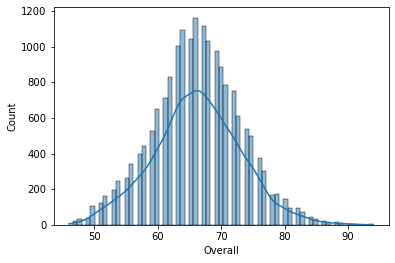

In [55]:
sns.histplot(fifa.Overall, kde=True)
plt.show()

In [56]:
fifa['Overall'].describe()

count    18147.000000
mean        66.253926
std          6.913320
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Overall, dtype: float64

In [57]:
fifa.corr()['Overall'].sort_values(ascending=False)

Overall                     1.000000
Reactions                   0.850071
Composure                   0.727646
Potential                   0.660947
Special                     0.607108
ShortPassing                0.502275
International Reputation    0.499596
Vision                      0.498683
LongPassing                 0.483639
BallControl                 0.460034
Age                         0.453354
ShotPower                   0.441080
LongShots                   0.420791
Curve                       0.419501
Skill Moves                 0.414363
FKAccuracy                  0.397004
Aggression                  0.395142
Crossing                    0.394849
Volleys                     0.391445
Dribbling                   0.372358
Stamina                     0.365652
Positioning                 0.356497
Strength                    0.349318
Penalties                   0.341639
HeadingAccuracy             0.340602
Finishing                   0.332674
Interceptions               0.321174
M

In [68]:
fifa= fifa.select_dtypes(include='number')
X = fifa.drop(['Overall', 'Potential'], axis=1)
y= fifa['Overall']

Divide into train and testing data

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

TRAIN THE MODEL!

In [70]:
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

Predict on the test dataset

In [71]:
y_pred = lin.predict(X_test)

In [72]:
from sklearn.metrics import r2_score

Checking the accuracy of the mode

In [73]:
r2_score(y_test, y_pred)

0.9654982828617398

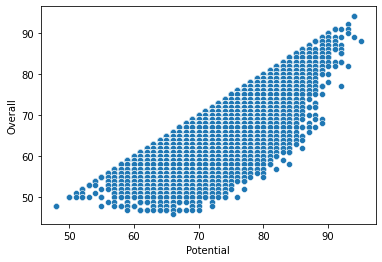

In [77]:
sns.scatterplot(x='Potential', y='Overall', data=fifa)
plt.show()